# Traffic Signs Recognition

### Imports

In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as pyplot
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import random

In [3]:
data = []
labels = []
classes = 43 # 43 tane trafik işareti sınıfımız var
cur_path = os.getcwd()

In [4]:
cur_path

'C:\\Users\\LENOVO\\Desktop\\Proje2'

### Preprocess the Images

In [5]:
for i in range(classes): # i = 0,1,..42 herbir klasör(trafik işareti sınıfı) için: 
    # path degiskeni bu döngüde herbir trafik işareti sınıfının dosya yolunu alır
    path = os.path.join(cur_path,'archive','train',str(i)) # path = 'C:\\Users\\LENOVO\\Desktop\\Proje2\\archive\\train\\0,1..'
    images = os.listdir(path) # path dizinindeki dosya ve klasörlerin isimlerinin listesini images değişkenine atar. 
    for a in images: # images degiskeninde belirtilen path'teki görüntülerin dosya adları vardır ve sınıfa ait herbir görüntü için:
        try:
            image = Image.open(path + '\\'+ a) # Görüntü dosyasını açar ve Image modülü kullanarak görüntü nesnesi olarak yükler.
            image = image.resize((30,30)) # Tüm görüntüleri eşit boyuta getirmek için yeniden boyutlandırır
            image = np.array(image) # Görüntüyü nd array objesine dönüştürür
            data.append(image) # görüntüyü data listesine ekler
            labels.append(i) # görüntünün sınıfını (etiketini) labels listesine ekler
        except Exception as e:
            print(e)

In [6]:
# Daha hızlı işlemler için listeleri numpy arraylerine çevirme:
data = np.array(data)
labels = np.array(labels)

In [7]:
data[0].shape

(30, 30, 3)

### Save Labels & Data for future use
Bu kod, os.mkdir() işlevini kullanarak 'saved' adında bir dizin oluşturur. Daha sonra, np.save() işlevini kullanarak data ve labels değişkenlerini numpy dizileri olarak kaydeder. './saved/data.npy' ve './saved/target.npy' olarak adlandırılan dosyalar oluşturulur ve içerisine veri ve etiketler kaydedilir.
Bu kod, veri setini numpy dizileri olarak kaydetmemizi sağlar. Böylece ileride bu dizileri kullanarak veri işleme veya model eğitimi yapabiliriz. Çok fazla verimiz olduğu için yukarıda tanımlanan preprocessing işlemi vakit alır. Image verilerimizi kaydederek tekrardan preprocessing işlemi yapmadan bu verileri kullanabiliriz

In [8]:
#os.mkdir("saved")
np.save('./saved/data',data)
np.save('./saved/target',labels)

### Load data & Labels 

In [10]:
data=np.load('./saved/data.npy')
labels=np.load('./saved/target.npy')

(39209, 30, 30, 3) çıktısı, data dizisinin 39209 örnek içerdiğini, her bir örneğin boyutunun 30x30 piksel olduğunu ve RGB renk formatında olduğunu gösterir.

In [11]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(data, labels, test_size=0.2, random_state=0)

In [13]:
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


## Basic Descriptive Analysis

### Look for class bias

"Class bias", bir veri setindeki sınıflar arasında dengesizlik veya eşitsizlik durumunu ifade eder. Sınıf biası, bir sınıfın diğer sınıflara göre daha fazla veya daha az temsil edildiği durumları belirtir.
Sınıf biası genellikle makine öğrenimi ve veri analizi gibi alanlarda önemlidir. Eğer bir veri setinde sınıf biası varsa, bu durum model performansını etkileyebilir ve yanlı sonuçlara yol açabilir. Örneğin, nadir olan veya daha az temsil edilen sınıfların doğru sınıflandırılması zor olabilir veya algoritma daha çok temsil edilen sınıflara yönelik eğilimli hale gelebilir.


[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42]
 [ 169 1781 1799 1134 1578 1485  332 1143 1147 1189 1619 1040 1691 1730
   614  513  329  884  982  176  286  261  313  411  203 1181  467  193
   415  212  349  623  201  576  348  983  317  161 1627  235  289  186
   195]]
Örneğin 0 sınıfında 169 tane görsel bulunuyor.


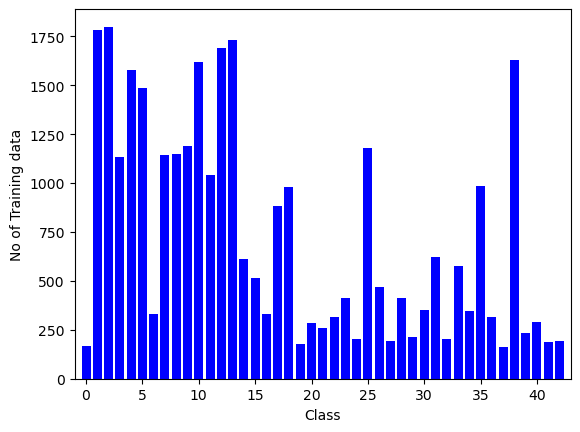


Belirli sınıflar yeterince temsil edilmediğinden, sınıf yanlılığı(class bias) sorununu görebiliyoruz.


Traffic Sign Images


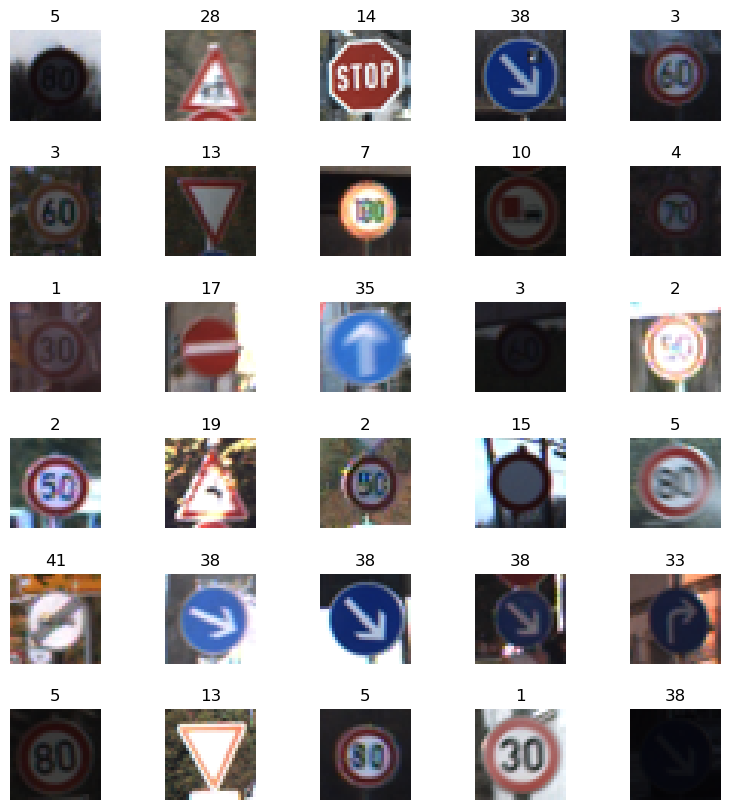

In [14]:

unique_elements, counts_elements = np.unique(y_train, return_counts = True)
print(np.asarray((unique_elements, counts_elements)))
print("Örneğin {} sınıfında {} tane görsel bulunuyor.".format(unique_elements[0], counts_elements[0]))

# Sütun grafiğinin oluşturulması : 
pyplot.bar( np.arange( 43 ), counts_elements, align='center',color='blue' )
pyplot.xlabel('Class')
pyplot.ylabel('No of Training data')
pyplot.xlim([-1, 43])
pyplot.show()

print("\nBelirli sınıflar yeterince temsil edilmediğinden, sınıf yanlılığı(class bias) sorununu görebiliyoruz.\n\n")

%matplotlib inline

# Veri setinden seçilen rastgele görüntülerin gösterilmesi
print("Traffic Sign Images")
fig, axs = pyplot.subplots(6,5, figsize=(10, 10)) # 6 satır 5 sütunluk bir grid oluşturur
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i in range(30):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])
    

One hot Encoding

In [15]:
y_train = to_categorical(y_train, 43)
y_valid = to_categorical(y_valid, 43)

### Build the Model

In [16]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# 43 sınıfımız olduğu için son katman bu sınıf sayısıyla eşleşmeli:
model.add(Dense(43, activation='softmax'))

In [17]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
epochs = 25
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_valid, y_valid))

Epoch 1/25
981/981 [==============================] - 44s 43ms/step - loss: 2.2054 - accuracy: 0.4261 - val_loss: 0.7589 - val_accuracy: 0.7744
Epoch 2/25
981/981 [==============================] - 54s 55ms/step - loss: 0.7605 - accuracy: 0.7725 - val_loss: 0.2609 - val_accuracy: 0.9374
Epoch 3/25
981/981 [==============================] - 57s 58ms/step - loss: 0.4060 - accuracy: 0.8801 - val_loss: 0.1473 - val_accuracy: 0.9603
Epoch 4/25
981/981 [==============================] - 42s 43ms/step - loss: 0.3257 - accuracy: 0.9086 - val_loss: 0.1338 - val_accuracy: 0.9614
Epoch 5/25
981/981 [==============================] - 41s 42ms/step - loss: 0.2916 - accuracy: 0.9181 - val_loss: 0.1149 - val_accuracy: 0.9682
Epoch 6/25
981/981 [==============================] - 54s 55ms/step - loss: 0.2512 - accuracy: 0.9292 - val_loss: 0.0694 - val_accuracy: 0.9824
Epoch 7/25
981/981 [==============================] - 65s 66ms/step - loss: 0.2360 - accuracy: 0.9359 - val_loss: 0.0852 - val_accuracy:

### Model Summary and Visualization

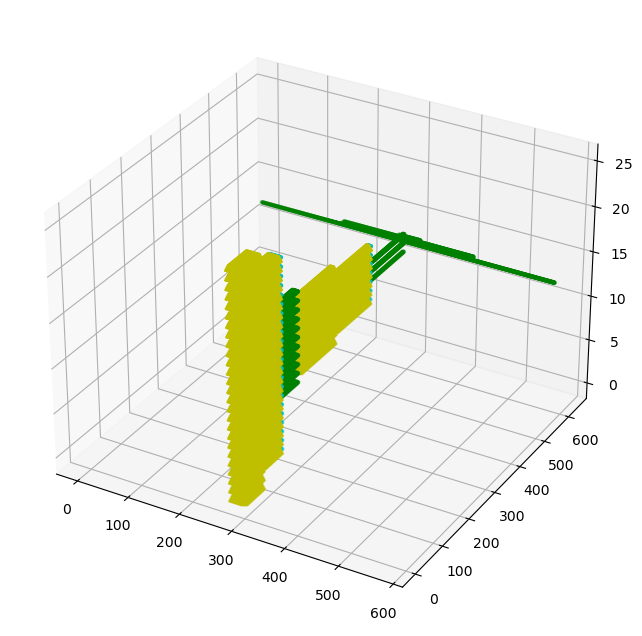

In [19]:
from neuralplot import ModelPlot
#model = tf.keras.models.Model(inputs=X_input, outputs=X)
modelplot = ModelPlot(model=model, grid=True, connection=True, linewidth=0.1)
modelplot.show()

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

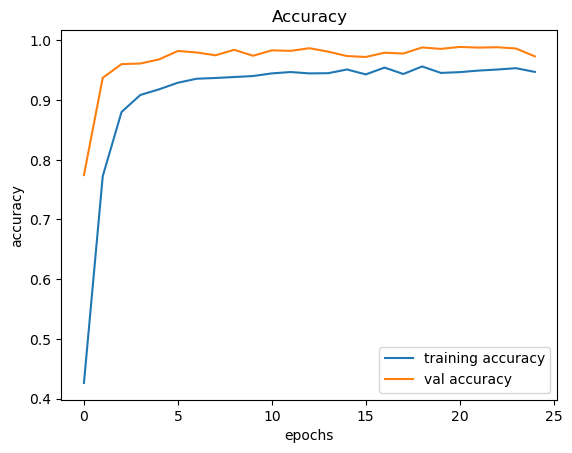

In [21]:
# accuracy 
import matplotlib.pyplot as plt
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

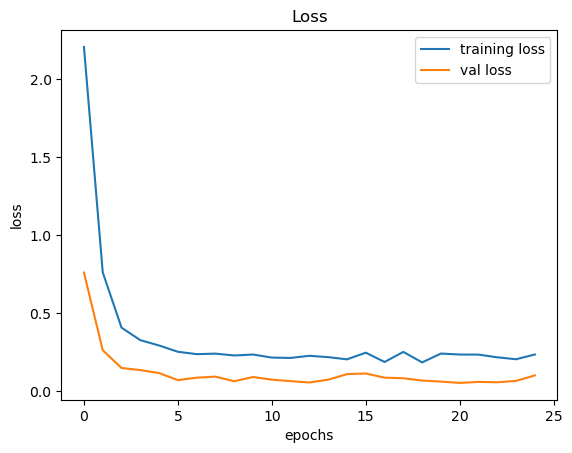

In [22]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Testing On Test Data

In [23]:
os.getcwd()

'C:\\Users\\LENOVO\\Desktop\\Proje2'

In [24]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv) # Test.csv dosyası okunur
    label = y_test["ClassId"].values # Test.csv dosyasındaki ClassId sütunu yani etiketler numpy arrayine dönüştürülür
    imgs = y_test["Path"].values # Test.csv dosyasındaki Path sütunu imgs numpy arrayine dönüştürülür
    data=[]
    for img in imgs:
        img = img.lstrip("Test/")
        image_path = os.path.join(os.getcwd(),"archive","Test")
        image = Image.open(image_path + "\\" + img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label # Yeniden boyutlandırılmış ve numpy arrayine dönüştürülmüş görseller ve sınıfları geri döndürülür

In [25]:
X_test, label = testing('archive/Test.csv')

In [26]:
X_test.shape

(12630, 30, 30, 3)

In [27]:
# model.predict_classes(X_test)
Y_pred = model.predict(X_test)
y_pred_classes = np.argmax(Y_pred, axis=1)
print(y_pred_classes)

395/395 [==============================] - 4s 9ms/step
[16  1 38 ... 42  7 10]


### Confusion Matrix

In [28]:
# Confusion Matrix Oluşturulması:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(label, y_pred_classes) # y_true, y_pred
print(cm)


[[ 59   1   0 ...   0   0   0]
 [  0 711   7 ...   0   0   0]
 [  0   5 735 ...   0   0   0]
 ...
 [  0   2  25 ...  50   0   0]
 [  0   0   0 ...   1  48   0]
 [  0   0   0 ...   0   0  89]]


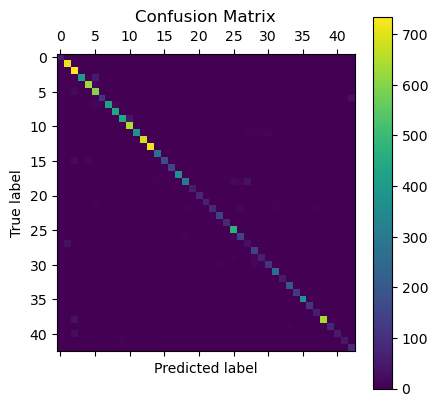

In [29]:
# Confusion matrix gösterimi
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Classification Report 

In [30]:
from sklearn.metrics import classification_report
cr = classification_report(label, y_pred_classes) # y_true, y_pred
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        60
           1       0.92      0.99      0.95       720
           2       0.86      0.98      0.92       750
           3       0.96      0.87      0.91       450
           4       0.96      0.95      0.96       660
           5       0.86      0.95      0.90       630
           6       0.95      0.73      0.82       150
           7       0.97      0.93      0.95       450
           8       0.94      0.97      0.96       450
           9       0.98      0.92      0.95       480
          10       0.93      0.98      0.95       660
          11       0.96      0.90      0.93       420
          12       0.96      0.99      0.98       690
          13       0.99      0.99      0.99       720
          14       0.96      1.00      0.98       270
          15       0.98      0.83      0.90       210
          16       0.97      1.00      0.99       150
          17       1.00    

In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, y_pred_classes))

0.9317498020585907


### Save the Model

In [32]:
model.save("./saved/TSR.h5")

### Load the Model 

In [33]:
import os
os.chdir(r'C:\\Users\\LENOVO\\Desktop\\Proje2')
from keras.models import load_model
model = load_model('./saved/TSR.h5')